In [285]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

#### Functions for importing, cleaning, and sub-setting data XRF whole rock chemistry data.

In [286]:
## CSV to pandas DataFrame Import##
from tabulate import tabulate
def csv_to_df(filename, filepath=None):
    """
    Extracts major and trace/REE element oxide data from a .csv and organizes it into a pandas DataFrame.
            - Each column is a different oxide/species/category.
            - Each sample is a row in the .csv file.
            - Each sample becomes a row in a pandas DataFrame.
            - Data can be filtered by sample name, oxide name, or special groups:
                - Major elements
                - Trace elements
                - REE elements

    ****At the moment, all data includes the LOI + sum values.

    Parameters:
        - filename: str - name of the .csv file
        - **folderpath: str, optional: path to folder if not sci-data

    Returns:
        pd.DataFrame: The imported data as a pandas DataFrame.
    """
    if filepath is None:
        script_dir = os.path.expanduser('~/PycharmProjects/scientific-coding-v1/sci-data/')
        filepath = os.path.join(script_dir, filename)

        df = pd.read_csv(filepath)
        column_names = list(df.columns)

        print(f"Columns:{column_names}")
        print(f"\n .csv file successfully imported.")
    return df

def extract_MajorOx(df):
    """
    Extracts major element oxides from a pandas DataFrame.

    Places them in a list alongside oxides expected by MELTS as input.

        MAJOR OXIDES:
            - SiO2
            - TiO2
            - Al2O3
            - Fe2O3
            - Cr2O3
            - FeO
            - MnO
            - MgO
            - NiO
            - CoO
            - CaO
            - Na2O
            - K2O
            - P2O5

        VOLATILE PHASES:
            - H2O
            - CO2
            - SO3
            - Cl2O-1
            - F2O-1
    """
    major_oxides = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O', 'CO2', 'SO3', 'Cl2O-1', 'F2O-1']
    major_df = df[major_oxides]
    print("\n Major oxides extracted.")
    return major_df

## Test

In [287]:
rawdata = csv_to_df('tuolumnedata_csvready.csv')

# Use function to extract major oxides, fill NaN values with '0', ensure all values are float types for future calculations.
cleaned_df = extract_MajorOx(rawdata)
cleaned_df = cleaned_df.fillna(0)
cleaned_df = cleaned_df.replace('n.d.',0)
cleaned_df = cleaned_df.astype(float)

Columns:['Sample', 'Type', 'SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O', 'CO2', 'SO3', 'Cl2O-1', 'F2O-1', 'LOI (%)', 'sumMaj+LOI', 'sumAll', 'F >=', 'Cl >=', 'SO3 >=', 'Br >=', 'As >=', 'Ni', 'Cr', 'V', 'Sc', 'Cu', 'Zn', 'Ga', 'Ba', 'Rb', 'Cs', 'Sr', 'Y', 'Zr', 'Hf', 'Nb', 'Ta', 'Mo', 'La', 'Ce', 'Nd', 'Sm', 'Dy', 'Yb', 'Th', 'U', 'Tl', 'Pb', 'Sn', 'Bi', 'Sb']

 .csv file successfully imported.

 Major oxides extracted.


### Error calculations for experimental XRF data

In [288]:
## Should be eventually replaced with a scaleable loop, but for now, this works.
error_table = rawdata.iloc[-6:, 2:]
error_table = error_table.fillna(0)
error_table = error_table.replace('n.d.',0)

error_table=error_table.astype(float)
error1 = abs(error_table.iloc[0,:] - error_table.iloc[3,:]) #Absolute value of experimental error
error_table.loc['error1'] = error1

error2 = abs(error_table.iloc[1,:] - error_table.iloc[4,:]) #Absolute value of experimental error
error_table.loc['error2'] = error2

error3 = abs(error_table.iloc[2,:] - error_table.iloc[5,:]) #Absolute value of experimental error
error_table.loc['error3'] = error3

avg_error = (error1 + error2 + error3) / 3
error_table.loc['avg_error'] = avg_error

cleaned_df.loc['XRF_error'] = avg_error

error_table = error_table.iloc[-4:,:]

In [289]:
## Standard deviation
N=3
for i in range(N):
    s = (error_table.iloc[(i),:] - error_table.iloc[3,:])**2
    s = s * (1/3)
    s = np.sqrt(s)

In [290]:
for i in range(N):
    seom = s / np.sqrt(N)
error_table.loc['seom'] = seom
error_table = error_table.fillna(0)
error_table

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,SO3,Cl2O-1,F2O-1,LOI (%),sumMaj+LOI,sumAll,F >=,Cl >=,SO3 >=,Br >=,As >=,Ni,Cr,V,Sc,Cu,Zn,Ga,Ba,Rb,Cs,Sr,Y,Zr,Hf,Nb,Ta,Mo,La,Ce,Nd,Sm,Dy,Yb,Th,U,Tl,Pb,Sn,Bi,Sb
error1,0.364497,0.003682,0.040144,0.0,0.0,0.110367,0.001144,0.019102,0.0,0.0,0.000791,0.039730,0.019544,0.001870,0.0,0.0,0.0,0.0,0.0,0.0,0.588183,0.506920,0.070721,0.000546,0.012758,2.501743,2.182407,3.217745,0.226813,0.447458,1.001073,1.245376,1.452765,0.862997,16.384137,0.355414,1.860197,1.291192,1.798627,8.035345,0.772015,1.628967,0.108994,0.848976,1.314682,3.623710,1.234173,0.351393,0.497115,0.182302,0.137323,0.113917,0.761773,1.103507,2.985603,0.008599,3.641769
error2,0.624184,0.019661,0.037999,0.0,0.0,0.093277,0.003327,0.003784,0.0,0.0,0.005577,0.077348,0.014036,0.006441,0.0,0.0,0.0,0.0,0.0,0.0,0.857561,0.857466,0.031720,0.000599,0.028708,4.510393,2.341279,1.271984,1.430923,0.366046,0.394225,0.627288,0.079826,0.506907,2.610565,0.229791,0.927675,6.321737,1.221748,8.405877,0.924108,1.068191,0.016138,0.416776,0.068130,0.779751,1.316612,0.190455,0.278685,1.348038,0.307694,0.293883,0.029954,0.201020,1.720000,0.113520,0.443106
error3,0.002948,0.002174,0.075641,0.0,0.0,0.072974,0.000455,0.004134,0.0,0.0,0.020911,0.065567,0.002191,0.000472,0.0,0.0,0.0,0.0,0.0,0.0,0.085908,0.044928,0.040077,0.001146,0.002042,7.000000,0.558907,1.604680,0.885302,1.461777,0.298281,0.313055,1.992842,0.337313,6.742246,0.245457,0.920735,3.215084,1.799207,6.961306,2.805247,1.542350,0.770527,0.060783,0.088272,3.907299,1.297822,0.424768,0.074344,0.446952,0.395596,0.340000,0.047349,0.871338,0.880000,0.032311,0.220000
avg_error,0.330543,0.008506,0.051261,0.0,0.0,0.092206,0.001642,0.009007,0.0,0.0,0.009093,0.060881,0.011924,0.002928,0.0,0.0,0.0,0.0,0.0,0.0,0.510551,0.469771,0.047506,0.000764,0.014503,4.670712,1.694198,2.031470,0.847679,0.758427,0.564526,0.728573,1.175144,0.569073,8.578983,0.276888,1.236203,3.609338,1.606527,7.800843,1.500457,1.413169,0.298553,0.442178,0.490361,2.770253,1.282869,0.322205,0.283381,0.659097,0.280205,0.249267,0.279692,0.725288,1.861868,0.051477,1.434958
seom,0.109198,0.002111,0.008127,0.0,0.0,0.006411,0.000396,0.001624,0.0,0.0,0.003939,0.001562,0.003244,0.000818,0.0,0.0,0.0,0.0,0.0,0.0,0.141548,0.141614,0.002476,0.000127,0.004153,0.776429,0.378430,0.142263,0.012541,0.234450,0.088748,0.138506,0.272566,0.077253,0.612246,0.010477,0.105156,0.131418,0.064226,0.279846,0.434930,0.043060,0.157325,0.127132,0.134030,0.379015,0.004984,0.034187,0.069679,0.070715,0.038464,0.030244,0.077448,0.048683,0.327289,0.006389,0.404986


In [291]:
cleaned_df.loc['seom'] = seom
id = rawdata['Sample']
type = rawdata['Type']
type

0                   host
1                   host
2                   host
3                   host
4                 aplite
5                   host
6                 aplite
7                   host
8                 aplite
9              elizabeth
10             elizabeth
11                 ReRun
12     RM run as unknown
13     RM run as unknown
14     RM run as unknown
15    RM accepted values
16    RM accepted values
17    RM accepted values
Name: Type, dtype: object

In [292]:
cleaned_df.insert(0, 'type', rawdata['Type'])

In [293]:
cleaned_df.insert(0, 'id', rawdata['Sample'])

In [294]:
aplite_data = cleaned_df.iloc[ [0,1,2,3,4,5,6,7,8,9,10,18,19] , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] ]

#### This is a clean major oxide DataFrame with the standard error of the mean (seom) for Harker diagram plotting.

In [295]:
aplite_data

,id,type,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,SO3,Cl2O-1,F2O-1
0,KHD105H,host,66.066406,0.548861,15.624385,0.0,0.0,3.732880,0.076576,1.524711,0.0,0.0,3.776396,3.642991,3.377294,0.179945,0.0,0.0,0.0,0.0,0.0
1,KKC103B,host,59.488558,0.885564,16.893312,0.0,0.0,6.088012,0.105994,3.120577,0.0,0.0,5.791956,3.472646,2.432116,0.214490,0.0,0.0,0.0,0.0,0.0
2,KHD107B,host,63.811922,0.644781,16.617554,0.0,0.0,4.147709,0.085269,1.756226,0.0,0.0,4.521935,4.016627,2.876374,0.219198,0.0,0.0,0.0,0.0,0.0
3,KCP109D,host,68.591354,0.438112,15.640367,0.0,0.0,2.427771,0.063995,0.777234,0.0,0.0,2.696797,4.550226,3.315973,0.162275,0.0,0.0,0.0,0.0,0.0
4,KCP109C,aplite,75.820463,0.081973,12.946199,0.0,0.0,0.663837,0.031223,0.089308,0.0,0.0,0.702542,4.374870,4.009420,0.008794,0.0,0.0,0.0,0.0,0.0
5,KCP114B,host,67.622928,0.475611,15.900443,0.0,0.0,2.794764,0.056634,0.875509,0.0,0.0,3.407064,4.469777,2.902462,0.195939,0.0,0.0,0.0,0.0,0.0
6,KCP109B,aplite,76.363613,0.069413,12.654557,0.0,0.0,0.517922,0.023925,0.054598,0.0,0.0,0.540023,3.972797,4.609559,0.005901,0.0,0.0,0.0,0.0,0.0
7,KHD106B,host,65.146071,0.546541,16.125992,0.0,0.0,3.654955,0.072742,1.580363,0.0,0.0,3.875722,3.658421,3.755211,0.195418,0.0,0.0,0.0,0.0,0.0
8,KCP109A,aplite,76.616213,0.079309,12.481429,0.0,0.0,0.623441,0.026245,0.055272,0.0,0.0,0.530665,3.981179,4.460937,0.003877,0.0,0.0,0.0,0.0,0.0
9,KCP108-M,elizabeth,69.494990,0.447260,14.881052,0.0,0.0,2.559606,0.061803,0.804506,0.0,0.0,2.784781,4.268707,3.132743,0.168059,0.0,0.0,0.0,0.0,0.0


#### Harker Diagram plotting

In [365]:
## First I'm going to create a function that will plot a single diagram based on a specific x and y axis input. 

def harker_diagram(plotLength, plotWidth, title, x, xlabel, y, ylabel, pointlabels, colorlist):   
    """
    Plots a Harker diagram with error bars for the specified x and y axes.

    Parameters:
        - plotLength: int - length of the plot
        - plotWidth: int - width of the plot
        - title: str - title of the plot
        - x: str - x-axis label
        - xlabel: str - x-axis label
        - y: str - y-axis label
        - ylabel: str - y-axis label
        - df: pd.DataFrame - DataFrame containing the data to plot
        - datarange: index - start:end of rows (samples) to plot
        - error: name of row that contains error measurements 
        
    """
    fig, ax = plt.subplots(figsize=(plotLength, plotWidth))
    fig.suptitle(title, fontsize=20)
    ax.scatter(x, y, color=colorlist)
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    
    for i, name in enumerate(pointlabels):
        ax.annotate(name, (x.iloc[i], y.iloc[i]), fontsize=10, ha='center', va='baseline',alpha=0.4 )
    
    # x-axis and labels
    return fig, ax

In [366]:
oxide_colors = {
    'SiO2': (0.321, 0.667, 0.369),
    'TiO2': (0.298, 0.294, 0.388),
    'Al2O3': (0.529, 0.749, 1.0),
    'FeO': (0.980, 0.286, 0.380),
    'MnO': (1.0, 0.725, 1.0),
    'MgO': (0.706, 0.878, 0.573),
    'CaO': (0.929, 0.490, 0.051),
    'Na2O': (0.0, 0.839, 0.788),
    'K2O': (0.757, 0.475, 0.875),
    'P2O5': (0.918, 0.769, 0.208),
    'H2O': (0.929, 0.808, 0.612),
    'CO2': (0.988, 0.545, 0.467),
    'SO3': (0.0, 0.0, 0.0),
}


IndexError: single positional indexer is out-of-bounds

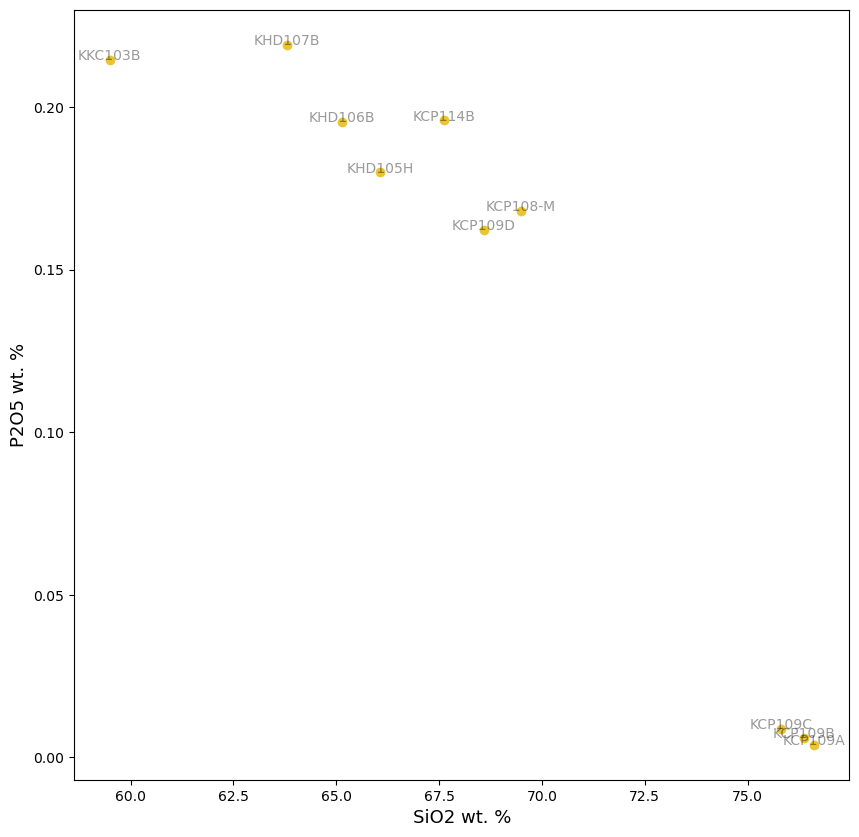

In [375]:
x_oxide = 'SiO2'
y_oxide = 'P2O5'
datalabels = aplite_data['id']

x_data = aplite_data[f'{x_oxide}'].iloc[0:10]
xlabel = f'{x_oxide} wt. %'

y_data = aplite_data[f'{y_oxide}'].iloc[0:10]
ylabel = f'{y_oxide} wt. %'

harker_diagram(10,10, '', x_data, xlabel, y_data, ylabel, datalabels, colorlist=oxide_colors[y_oxide])